## Titanic: Machine Learning From Disaster
### A Data Science Solution

This is a dataset containing a train module and a test module. There will be data wrangling, feature engineering, data cleaning, data visualisation, data analysis and a little bit of machine learning for the test module on the side. 
This notebook has been partly inspired by the notebook titled "Titanic Data Science Solutions", a great help indeed. 


We begin with a simple task, calling the libraries we need in order to analyse and predict with this dataset. 
For this, we will divide the libraries we call into 3 parts - 
* Data Cleaning / Wrangling
* Data Visualization / Analysis
* Machine Learning

### Importing Libraries

Importing Data Cleaning / Wrangling Libraries

In [1]:
import pandas as pd
import numpy as np

print("Libraries imported successfully")

Libraries imported successfully


Importing Data Visualisation / Analysis Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Libraries imported successfully")

Libraries imported successfully


Importing Machine Learning Libraries

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

print("Libraries imported successfully")

Libraries imported successfully


We now import the dataset

### Importing the Dataset

In [4]:
filepath_train = "../input/titanic/train.csv"
filepath_test = "../input/titanic/test.csv"
train = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)
data = pd.concat([train, test])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Now that we have imported the dataset, it is time we look around and see what is in the dataset. Starting with, we first check the columns that are present in the dataset. 

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Next, we check if there are any null values we can reject or convert to a value in the dataset.

In [6]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

We do not fill the data in just yet. As we can see clearly, Cabin has a majority of its values empty. It makes much more sense to drop this entire column.


As of now, we have imported and explored the dataset. It is now time to start briefly manipulating and analysing data

In [7]:
for titles in data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data = data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,NaN,0,0,8.0500,S,Mr
414,NaN,1,female,39.0,0,0,108.9000,C,Dona
415,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,NaN,3,male,NaN,0,0,8.0500,S,Mr


### Analysing the Training Dataset

We now start with makng valued comparisons across various features present in the training dataset. This gives an idea of how we interpret the dataset, and provides an understanding with regards to the various features present in the dataset. 

#### Check Survival Rate Based on Age

  AgeCat   Survived
0   0-16  55.000000
1  17-32  36.994220
2  33-48  40.425532
3  49-64  43.478261
4  65-80   9.090909


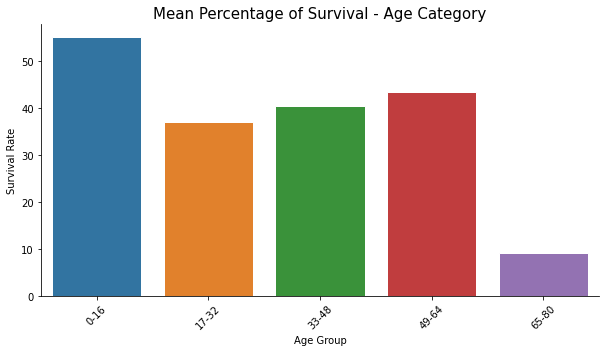

In [8]:
#segregating Age across 5 groups
age_grp = ['0-16', '17-32', '33-48', '49-64', '65-80']
train['AgeCat'] = pd.cut(train['Age'], 5)

#grouping Age
agecalc = train[['AgeCat', 'Survived']].groupby(['AgeCat'], as_index=False).mean()
agecalc['Survived'] = agecalc['Survived']*100
agecalc['AgeCat'] = age_grp
print(agecalc)

#plotting graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='AgeCat', y='Survived', data=agecalc.reset_index(), label="AgeCat", ax=ax)
ax.set_title("Mean Percentage of Survival - Age Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Age Group")
ax.set_xticklabels(age_grp, rotation=45)
plt.show()

#### Check Survival Rate Based on Gender

      Sex   Survived
0  female  74.203822
1    male  18.890815


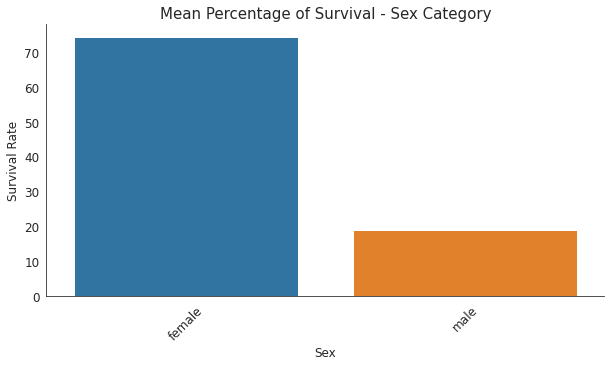

In [9]:
#grouping Gender
sexcalc = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sexcalc['Survived'] = sexcalc['Survived']*100
print(sexcalc)

#plotting graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Sex', y='Survived', data=sexcalc.reset_index(), label="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Sex Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Sex")
ax.set_xticklabels(sexcalc.Sex, rotation=45)
plt.show()

#### Check Survival Rate Based on Passenger Class

   Pclass   Survived
0       1  62.962963
1       2  47.282609
2       3  24.236253


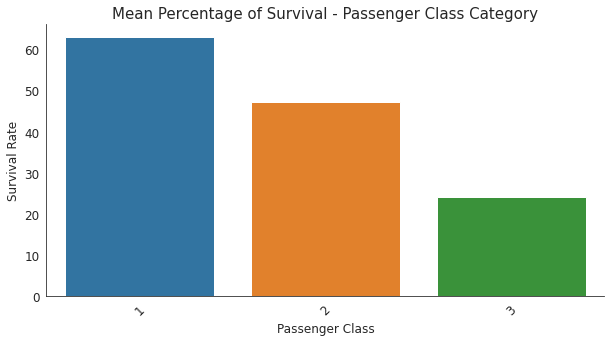

In [10]:
#grouping Passenger Class
pclasscalc = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclasscalc['Survived'] = pclasscalc['Survived']*100
print(pclasscalc)

#plotting graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Pclass', y='Survived', data=pclasscalc.reset_index(), label="Pclass", ax=ax)
ax.set_title("Mean Percentage of Survival - Passenger Class Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Passenger Class")
ax.set_xticklabels(pclasscalc.Pclass, rotation=45)
plt.show()

#### Check Survival Rate Based on Embarkation

  Embarked   Survived
0        C  55.357143
1        Q  38.961039
2        S  33.695652


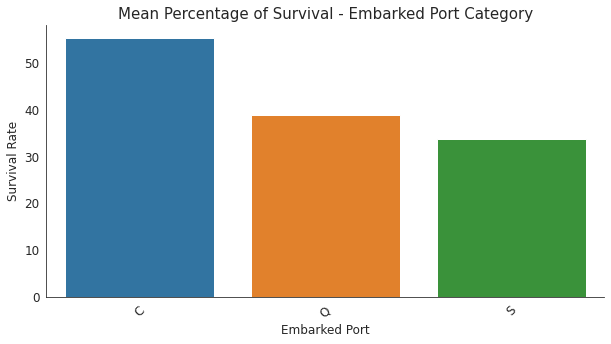

In [11]:
#grouping Embarked
embarkcalc = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
embarkcalc['Survived'] = embarkcalc['Survived']*100
print(embarkcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Embarked', y='Survived', data=embarkcalc.reset_index(), label="Embarked", ax=ax)
ax.set_title("Mean Percentage of Survival - Embarked Port Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Embarked Port")
ax.set_xticklabels(embarkcalc.Embarked, rotation=45)
plt.show()

#### Check Survival Rate Based on Title

    Title   Survived
0  Master  57.500000
1    Miss  70.270270
2      Mr  15.667311
3     Mrs  79.365079
4   Other  34.782609


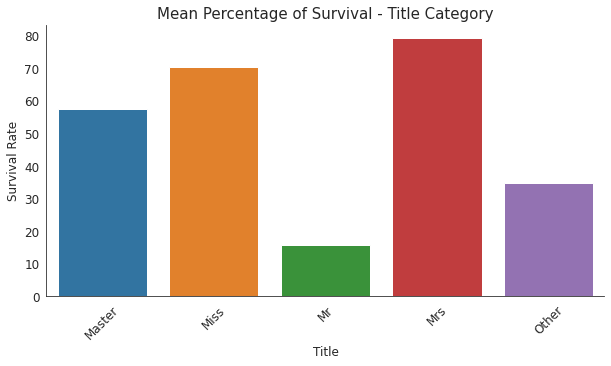

In [12]:
#segregating Title across 5 categories
for title in data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

#grouping Title
titlecalc = data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
titlecalc['Survived'] = titlecalc['Survived']*100
print(titlecalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Title', y='Survived', data=titlecalc.reset_index(), label="Embarked", ax=ax)
ax.set_title("Mean Percentage of Survival - Title Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Title")
ax.set_xticklabels(titlecalc.Title, rotation=45)
plt.show()

#### Check Survival Rate Based on Siblings / Spouse

   SibSp   Survived
0      0  34.539474
1      1  53.588517
2      2  46.428571
3      3  25.000000
4      4  16.666667
5      5   0.000000
6      8   0.000000


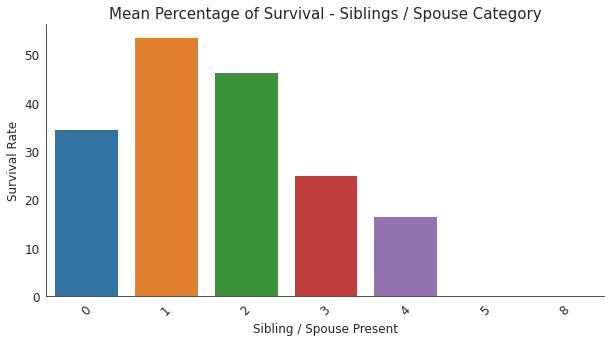

In [13]:
#grouping Sibling/Spouse
sibspcalc = train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
sibspcalc['Survived'] = sibspcalc['Survived']*100
print(sibspcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='SibSp', y='Survived', data=sibspcalc.reset_index(), label="SibSp", ax=ax)
ax.set_title("Mean Percentage of Survival - Siblings / Spouse Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Sibling / Spouse Present")
ax.set_xticklabels(sibspcalc.SibSp, rotation=45)
plt.show()

#### Check Survival Rate Based on Parent / Child

   Parch   Survived
0      0  34.365782
1      1  55.084746
2      2  50.000000
3      3  60.000000
4      4   0.000000
5      5  20.000000
6      6   0.000000


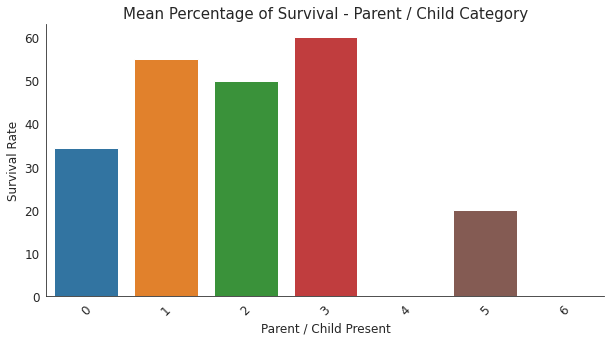

In [14]:
#grouping Parent / Child
parchcalc = train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
parchcalc['Survived'] = parchcalc['Survived']*100
print(parchcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Parch', y='Survived', data=parchcalc.reset_index(), label="Parch", ax=ax)
ax.set_title("Mean Percentage of Survival - Parent / Child Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Parent / Child Present")
ax.set_xticklabels(parchcalc.Parch, rotation=45)
plt.show()

#### Check Survival Rate Based on Age and Gender

  AgeCat     Sex   Survived
0   0-16  female  67.346939
1   0-16    male  43.137255
2  17-32  female  73.333333
3  17-32    male  17.699115
4  33-48  female  79.411765
5  33-48    male  18.333333
6  49-64  female  91.666667
7  49-64    male  17.777778
8  65-80  female   0.000000
9  65-80    male   9.090909


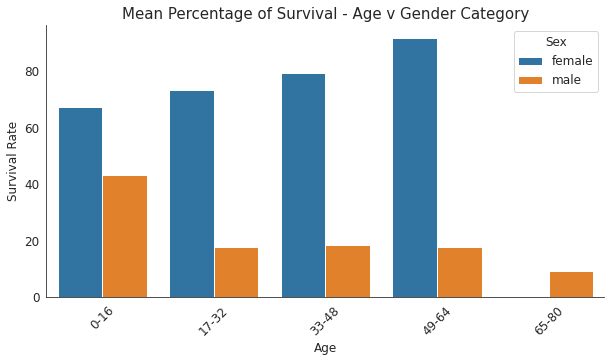

In [15]:
#segregating Age into 5 groups
age_grp = ['0-16', '0-16', '17-32', '17-32', '33-48', '33-48', '49-64', '49-64', '65-80', '65-80']
train['AgeCat'] = pd.cut(train['Age'], 5)

#grouping Age and Gender
agesexcalc = train[['AgeCat', 'Sex', 'Survived']].groupby(['AgeCat', 'Sex'], as_index=False).mean()
agesexcalc['Survived'] = agesexcalc['Survived']*100
agesexcalc['Survived'] = agesexcalc['Survived'].fillna(0)
agesexcalc['AgeCat'] = age_grp
print(agesexcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='AgeCat', y='Survived', data=agesexcalc.reset_index(), hue="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Age v Gender Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Age")
ax.set_xticklabels(['0-16', '17-32', '33-48', '49-64', '65-80'], rotation=45)
plt.show()

#### Check Survival Rate Based on Passenger Class and Gender

   Pclass     Sex   Survived
0       1  female  96.808511
1       1    male  36.885246
2       2  female  92.105263
3       2    male  15.740741
4       3  female  50.000000
5       3    male  13.544669


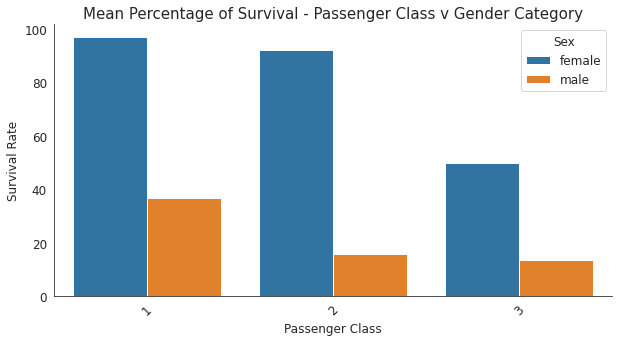

In [16]:
#grouping by Passenger Class and Gender
sexpclasscalc = train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean()
sexpclasscalc['Survived'] = sexpclasscalc['Survived']*100
print(sexpclasscalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Pclass', y='Survived', data=sexpclasscalc.reset_index(), hue="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Passenger Class v Gender Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=45)
plt.show()

#### Check Survival Rate Based on Embarkation and Gender

  Embarked     Sex   Survived
0        C  female  87.671233
1        C    male  30.526316
2        Q  female  75.000000
3        Q    male   7.317073
4        S  female  68.965517
5        S    male  17.460317


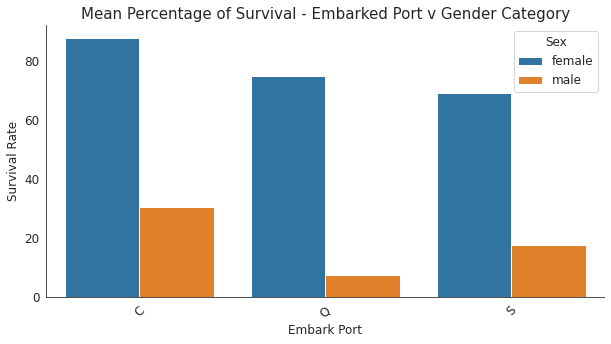

In [17]:
#grouping Embarked and Gender
sexembarkcalc = train[['Embarked', 'Sex', 'Survived']].groupby(['Embarked', 'Sex'], as_index=False).mean()
sexembarkcalc['Survived'] = sexembarkcalc['Survived']*100
print(sexembarkcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Embarked', y='Survived', data=sexembarkcalc.reset_index(), hue="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Embarked Port v Gender Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Embark Port")
ax.set_xticklabels(['C', 'Q', 'S'], rotation=45)
plt.show()

#### Check Survival Rate Based on Sibling / Spouse and Gender

    SibSp     Sex   Survived
0       0  female  78.735632
1       0    male  16.820276
2       1  female  75.471698
3       1    male  31.067961
4       2  female  76.923077
5       2    male  20.000000
6       3  female  36.363636
7       3    male   0.000000
8       4  female  33.333333
9       4    male   8.333333
10      5  female   0.000000
11      5    male   0.000000
12      8  female   0.000000
13      8    male   0.000000


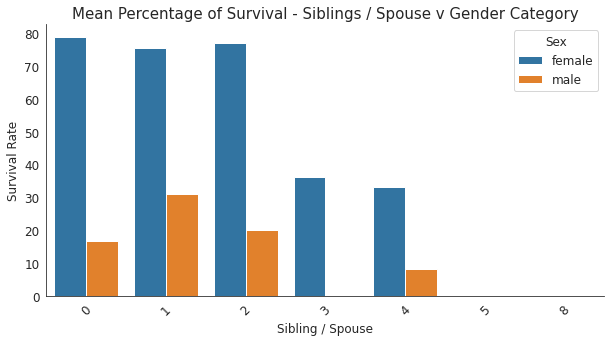

In [18]:
#grouping Sibling/Spouse and Gender
sexsibspcalc = train[['SibSp', 'Sex', 'Survived']].groupby(['SibSp', 'Sex'], as_index=False).mean()
sexsibspcalc['Survived'] = sexsibspcalc['Survived']*100
print(sexsibspcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='SibSp', y='Survived', data=sexsibspcalc.reset_index(), hue="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Siblings / Spouse v Gender Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Sibling / Spouse")
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 8], rotation=45)
plt.show()

#### Check Survival Rate Based on Parent/Child and Gender

    Parch     Sex   Survived
0       0  female  78.865979
1       0    male  16.528926
2       1  female  76.666667
3       1    male  32.758621
4       2  female  61.224490
5       2    male  32.258065
6       3  female  75.000000
7       3    male   0.000000
8       4  female   0.000000
9       4    male   0.000000
10      5  female  25.000000
11      5    male   0.000000
12      6  female   0.000000


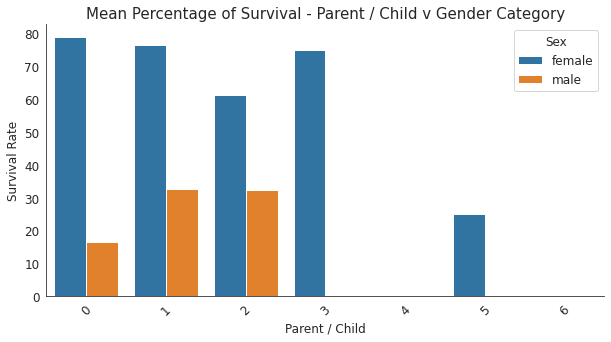

In [19]:
#grouping Parent/Child and Gender
sexparchcalc = train[['Parch', 'Sex', 'Survived']].groupby(['Parch', 'Sex'], as_index=False).mean()
sexparchcalc['Survived'] = sexparchcalc['Survived']*100
print(sexparchcalc)

#plotting Graph
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(x='Parch', y='Survived', data=sexparchcalc.reset_index(), hue="Sex", ax=ax)
ax.set_title("Mean Percentage of Survival - Parent / Child v Gender Category", fontsize=15)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Parent / Child")
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6], rotation=45)
plt.show()

With this we complete our analysis section. Now that we have a brief understanding of the data present, it is time to mould and engineer the data in a way that makes it easier for predictions.

### Wrangling, Cleaning and Engineering our Dataset

The best way to represent the dataset is to represent it in numerical form. So, for every unique value in a dataset, we assign it a number. 

Survived has two values 0 and 1. They are already in numeric form.

Pclass, SibSp and Parch are also represented in numeric form. 

Sex has two values, male and female. This column can be presented in the form of 0 and 1.

Embarked has three values, C, Q and S. This column can be presented in the form of 0, 1 and 2.
 
Age and Title are two such categories where there is a bit of feature engineering required. 

#### Mapping Title to Numerical Values

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
data["Title"] = data['Title'].map(title_mapping)
data['Title'].fillna(data['Title'].dropna().median(), inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,1
1,1.0,1,female,38.0,1,0,71.2833,C,3
2,1.0,3,female,26.0,0,0,7.9250,S,2
3,1.0,1,female,35.0,1,0,53.1000,S,3
4,0.0,3,male,35.0,0,0,8.0500,S,1
5,0.0,3,male,NaN,0,0,8.4583,Q,1
6,0.0,1,male,54.0,0,0,51.8625,S,1
7,0.0,3,male,2.0,3,1,21.0750,S,4
8,1.0,3,female,27.0,0,2,11.1333,S,3
9,1.0,2,female,14.0,1,0,30.0708,C,3


#### Mapping Gender to Numerical Values

In [21]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,7.2500,S,1
1,1.0,1,1,38.0,1,0,71.2833,C,3
2,1.0,3,1,26.0,0,0,7.9250,S,2
3,1.0,1,1,35.0,1,0,53.1000,S,3
4,0.0,3,0,35.0,0,0,8.0500,S,1
5,0.0,3,0,NaN,0,0,8.4583,Q,1
6,0.0,1,0,54.0,0,0,51.8625,S,1
7,0.0,3,0,2.0,3,1,21.0750,S,4
8,1.0,3,1,27.0,0,2,11.1333,S,3
9,1.0,2,1,14.0,1,0,30.0708,C,3


#### Mapping Age to Numerical Values

In [22]:
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,1.0,1,0,7.2500,S,1
1,1.0,1,1,2.0,1,0,71.2833,C,3
2,1.0,3,1,1.0,0,0,7.9250,S,2
3,1.0,1,1,2.0,1,0,53.1000,S,3
4,0.0,3,0,2.0,0,0,8.0500,S,1
5,0.0,3,0,1.0,0,0,8.4583,Q,1
6,0.0,1,0,3.0,0,0,51.8625,S,1
7,0.0,3,0,0.0,3,1,21.0750,S,4
8,1.0,3,1,1.0,0,2,11.1333,S,3
9,1.0,2,1,0.0,1,0,30.0708,C,3


#### Mapping Embarked to Numerical Values

In [23]:
data["Embarked"] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
data['Embarked'] = data["Embarked"].fillna(0)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,1.0,1,0,7.2500,0.0,1
1,1.0,1,1,2.0,1,0,71.2833,1.0,3
2,1.0,3,1,1.0,0,0,7.9250,0.0,2
3,1.0,1,1,2.0,1,0,53.1000,0.0,3
4,0.0,3,0,2.0,0,0,8.0500,0.0,1
5,0.0,3,0,1.0,0,0,8.4583,2.0,1
6,0.0,1,0,3.0,0,0,51.8625,0.0,1
7,0.0,3,0,0.0,3,1,21.0750,0.0,4
8,1.0,3,1,1.0,0,2,11.1333,0.0,3
9,1.0,2,1,0.0,1,0,30.0708,1.0,3


#### Mapping Fare to Numerical Values

In [24]:
data['Fare'].fillna(data['Fare'].dropna().median(), inplace=True)
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,1.0,1,0,0,0.0,1
1,1.0,1,1,2.0,1,0,3,1.0,3
2,1.0,3,1,1.0,0,0,1,0.0,2
3,1.0,1,1,2.0,1,0,3,0.0,3
4,0.0,3,0,2.0,0,0,1,0.0,1
5,0.0,3,0,1.0,0,0,1,2.0,1
6,0.0,1,0,3.0,0,0,3,0.0,1
7,0.0,3,0,0.0,3,1,2,0.0,4
8,1.0,3,1,1.0,0,2,1,0.0,3
9,1.0,2,1,0.0,1,0,2,1.0,3


#### Mapping IsAlone to Numerical Values

In [25]:
data['IsAlone'] = 0
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,FamilySize
0,0.0,3,0,1.0,1,0,0,0.0,1,0,2
1,1.0,1,1,2.0,1,0,3,1.0,3,0,2
2,1.0,3,1,1.0,0,0,1,0.0,2,1,1
3,1.0,1,1,2.0,1,0,3,0.0,3,0,2
4,0.0,3,0,2.0,0,0,1,0.0,1,1,1
5,0.0,3,0,1.0,0,0,1,2.0,1,1,1
6,0.0,1,0,3.0,0,0,3,0.0,1,1,1
7,0.0,3,0,0.0,3,1,2,0.0,4,0,5
8,1.0,3,1,1.0,0,2,1,0.0,3,0,3
9,1.0,2,1,0.0,1,0,2,1.0,3,0,2


#### Cleaning Remainder Data

In [26]:
data['Embarked'] = data['Embarked'].astype(int)
data['Title'] = data['Title'].astype(int)
data['Age'] = data['Age'].astype(int)
data = data.drop(['SibSp', 'Parch'], axis = 1)
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize
0,0.0,3,0,1,0,0,1,0,2
1,1.0,1,1,2,3,1,3,0,2
2,1.0,3,1,1,1,0,2,1,1
3,1.0,1,1,2,3,0,3,0,2
4,0.0,3,0,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,1,1,0,1,1,1
414,NaN,1,1,2,3,1,5,1,1
415,NaN,3,0,2,0,0,1,1,1
416,NaN,3,0,1,1,0,1,1,1


Now that we have seen how the cleaned data will look like, we arrive at a slight dilemma. The "data" in question is a combination of the train and test datasets. 

Since we have done all our operations on data, it as not been reflected in the train and test datasets. We require the train and test datasets to reflect the same data as that is what will be used in the machine learning models. 

Hence, we will apply the above mapping and cleaning operations to both, the train and the test data. 

In [27]:
data = [train, test]

#### Cleaning and Mapping Train Dataset

In [28]:
#mapping Title
for title in data:
    train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
for title in test:
    train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    train['Title'] = train['Title'].replace('Mlle', 'Miss')
    train['Title'] = train['Title'].replace('Ms', 'Miss')
    train['Title'] = train['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
train["Title"] = train['Title'].map(title_mapping)
train['Title'].fillna(train['Title'].dropna().median(), inplace=True)

#mapping Sex
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} )
train['Sex'].fillna(train['Sex'].dropna().median(), inplace=True)
train['Sex'] = train['Sex'].astype(int)

#mapping Age
train['Age'].fillna(train['Age'].dropna().median(), inplace=True)
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

#mapping Fare
train['Fare'].fillna(train['Fare'].dropna().median(), inplace=True)
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

#mapping Embarked
train["Embarked"] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
train['Embarked'] = train["Embarked"].fillna(0)

#mapping IsAlone
train['IsAlone'] = 0
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

#cleaning up Remainder Data
train['Embarked'] = train['Embarked'].astype(int)
train['Title'] = train['Title'].astype(int)
train['Age'] = train['Age'].astype(int)
train = train.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'AgeCat'], axis = 1)

#display Data
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize
0,0,3,0,1,0,0,1,0,2
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,1
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,1
5,0,3,0,1,1,2,1,1,1
6,0,1,0,3,3,0,1,1,1
7,0,3,0,0,2,0,4,0,5
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,2


#### Cleaning and Mapping Test Dataset

In [29]:
#mapping Title
for title in data:
    test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
for title in test:
    test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    test['Title'] = test['Title'].replace('Mlle', 'Miss')
    test['Title'] = test['Title'].replace('Ms', 'Miss')
    test['Title'] = test['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
test["Title"] = test['Title'].map(title_mapping)
test['Title'].fillna(test['Title'].dropna().median(), inplace=True)

#mapping Sex
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} )
test['Sex'].fillna(test['Sex'].dropna().median(), inplace=True)
test['Sex'] = test['Sex'].astype(int)

#mapping Age
test['Age'].fillna(test['Age'].dropna().median(), inplace=True)
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

#mapping Fare
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

#mapping Embarked
test["Embarked"] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
test['Embarked'] = test["Embarked"].fillna(0)

#mapping IsAlone
test['IsAlone'] = 0
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

#cleaning up Remainder Data
test['Embarked'] = test['Embarked'].astype(int)
test['Title'] = test['Title'].astype(int)
test['Age'] = test['Age'].astype(int)
test = test.drop(['SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'], axis = 1)

#display Data
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize
0,892,3,0,2,0,2,1,1,1
1,893,3,1,2,0,0,3,0,2
2,894,2,0,3,1,2,1,1,1
3,895,3,0,1,1,0,1,1,1
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,1
6,898,3,1,1,0,2,2,1,1
7,899,2,0,1,2,0,1,0,3
8,900,3,1,1,0,1,3,1,1
9,901,3,0,1,2,0,1,0,3


Now that the data has been dealt with, we can now move on to Machine Learning models. 

### Machine Learning using Models and Predictions

This is the final step of the model. Here, we use different machine learning algorithms to see which gives the best prediction with our data. 

We start with normalising both datasets, bringing them to the same shape and datatype.

In [30]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

We need to select models based on our data. Since we have all the data to begin with, we need not look beyond a Supervised Learning ALgorithm. All the model has to do in this case is use the vailable data to make comparisons and provide us with the best value. 

With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

* Logistic Regression Algorithm
* KNN or k-Nearest Neighbors Algorithm
* Support Vector Machines Algorithm
* Naive Bayes Classifier Algorithm
* Decision Tree Algorithm
* Random Forest Algorithm
* Perceptron Algorithm
* Artificial Neural Network Algorithm
* RVM or Relevance Vector Machine Algorithm

#### Logistic Regression Algorithm

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.59

We now provide a coefficient of correlation, to better help explain the data available to us. 

For example, we measure correlation as -> feature compared to its survival rate. 

So, within the sex category, female has the highest correlation with survival. 

Similarly, within title, Master and Mrs have the highest correlation with survival. 

We can map this out as shown below.

In [32]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.196941
5,Title,0.472763
4,Embarked,0.222050
3,Fare,0.205258
7,FamilySize,-0.449038
6,IsAlone,-0.480219
2,Age,-0.567819
0,Pclass,-0.892110


#### SVC Algorithm

In [33]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

#### k-Nearest Neighbours (kNN) Algorithm

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

#### Gaussian Algorithm

In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.13

#### Perceptron Algorithm

In [36]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.69

#### Linear SVC Algorithm

In [37]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.71

#### Stochastic Gradient Descent Algorithm

In [38]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.35

#### Decision Tree Classifier Algorithm

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.78

#### Random Forest Classifier Algorithm

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.78

Now that we have represented all the models, it is time to see which model performed best. 

In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.78
8,Decision Tree,88.78
1,KNN,84.29
0,Support Vector Machines,83.50
7,Linear SVC,81.71
2,Logistic Regression,81.59
4,Naive Bayes,80.13
5,Perceptron,79.69
6,Stochastic Gradient Descent,79.35


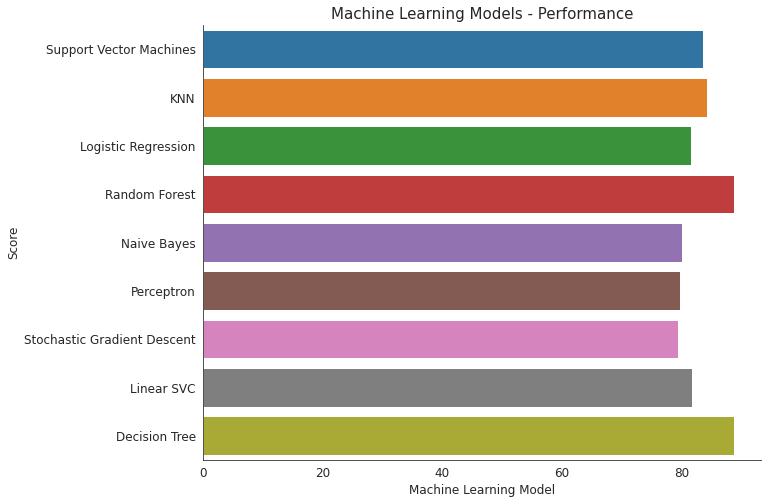

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.barplot(y='Model', x='Score', data=models.reset_index(), ax=ax)
ax.set_title("Machine Learning Models - Performance", fontsize=15)
ax.set_ylabel("Score")
ax.set_xlabel("Machine Learning Model")
ax.set_yticklabels(models.Model)
plt.show()

In [43]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv("Predictions Titanic.csv")